<a href="https://colab.research.google.com/github/lbcphysics/random_walk_and_diffusion/blob/master/quantum_random_walk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'>Part 1: Walking radomly with a quantum computer</font>
Imagine walking down a road and with a coin in hand. Before you take your next step you flip a coin to decide whether to walk one step forward or one step back:
- Heads: You take one step forward.
- Tails: You take one step backward.

After 10 steps where would you end up? This is a simple enough experiment to perform.
Now imagine that you wanted to determine what your average displacement would be from your starting point. You have three options 

1. You repeat this experiment a 1000 times ($10 \times 1000 = 10,000$ steps).
2. Get everyone at MSU to perform this experiment and ask them to report their findings.
3. Simulate this on a computer in a few minutes

We are going to use option 3 here. Specifically we will use a quantum computer to simulate a coin toss. 
We will be using qiskit python libraries developed by IBM in this notebook to perform this task and understand the details of random walk.

Note: the location of the actual physical qauntum computer is elsewhere. We can use the internet (the cloud) to access these quantum computers and run them.





# Learning Goals
1. Learn how to work with jupyter notebooks in the google colab environment to build a quantum circuit that simulates the results of a coin flip (H =1, T=0).
3. Learn how to simulate random walk with this quantum circuit.
4. Use this simulation to learn about the different properties of your random walk.
5. Learn about the probability distribution of random walk.
5. Learn how the probability distribution of random walk can be used to model and understand diffusion. 
6. Learn how random motion is different from coherent motion. 

# Initializing your setup
You will need to run the code block below to ensure that all the libraries are installed in your environment and are correctly imported. It is not necessary for you to understand whats going on here, however if you would like to please refer to the python programming documentation.
This may take a minute or two to run. 
Note: In order to run a block of code you can select run and either hit Run on top or press Shift+Enter on your keyboard.

In [ ]:
#!pip install qiskit - Needed in colab environment
pip install qiskit

In [2]:

# Include the necessary imports for this program
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute

# Import plotting libraries
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

# Fixing random state for reproducibility
#np.random.seed(19680801)

# Flipping a coin quantumly


    
Each time you flip a fair coin, each of the outcomes (Head or Tails) has a $\frac{1}{2}$ probability. 
In order to do this on a quantum computer we will need to set up a quantum circuit. 
A quantum circuit consists of 
- A quantum states 
- quantum gates that perform operations on the quantum state 
- and a measurement device. 

**<font color='red'> You do not need to know the details of this quantum circuit or anything related to quantum mechanics. All you need to know is that everytime I switch the circuti on I will generate either '0' or '1'. We will call T =0 and H=1. You may skip ahead if you are not interested.</font>**

Think of the quantum state as a coin and the gate as your hand that actualy flips the coin. 
Finally we need eyes to record the result of our coin flip and for that we need a measurement device that observes what state the coin has been flipped in.
Once flipped and then measured, there are two possible outcomes the quantum state is either in a  0 or 1 state.
- By 0 we will denote Tails.
- By 1 we will denote Heads.

We will first setup a quantum circuit with 
- A quantum register that contains the quantum state
- A [Hadamard gate](https://en.wikipedia.org/wiki/Quantum_logic_gate#Hadamard_(H)_gate "Hadamard gate on Wikipedia") that will perform the coin flip (quantum state flip)
- A classical register that will record and store the result of the coin flip (quantum state flip)





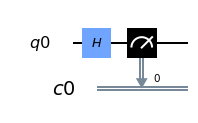

In [3]:
# Create a Quantum Register with 1 qubit (wire).
quantum_register = QuantumRegister(1)

# Create a Classical Register with 1 bit (double wire).
classical_register = ClassicalRegister(1)

# Create a Quantum Circuit from the quantum and classical registers
circuit = QuantumCircuit(quantum_register, classical_register)

# Place an Hadamard gate on the qubit wire
circuit.h(quantum_register[0])

# Measure the qubit into the classical register
circuit.measure(quantum_register, classical_register)

# Draw the circuit
circuit.draw(output='mpl')


If the above code ran correctly you should be able to see a quantum circuit like below
<img src="files/qc.png">
Congratulations you have just created your first quantum circuit.
- The Blue box denoted with a 'H' is called a Hadamard quantum gate that flips the quantum state.
- The Black box measures the quantum state.


**<font color='red'> You do not need to know the details of this quantum circuit or anything related to quantum mechanics. All you need to know is that everytime I switch the circuti on I will generate either '0' or '1'. We will call T =0 and H=1.</font>**


# Extra Information about quantum mechanics and quantum states - You can skip ahead if you are not interested.

The information here is for the curious mind, and is not necessary, you may skip ahead.

Quantum states denoted by $\vert\ \rangle$ the kind of quantum states that we will use are usually referred to as bipartitite quantum states, i.e. can only be observed to be a in the state  $\vert0\rangle$ or $\vert1\rangle$.
The funny thing about quantum states is that they can exist as a superposition of states,i.e.$\vert0\rangle \pm \vert1\rangle$. For example a quantum state can simultaneously be Heads or Tails! 
quantum gates that perform operations on the quantum state and a measurement device. 
To demonstrate the Hadamard gate, we'll create a simple quantum circuit with the [Qiskit](https://qiskit.org/) framework after we've imported the necessary items.

# Running your quantum circuit
Now that the quantum circuit has been defined and drawn, let's execute it on a quantum simulator, running the circuit once. Each run and measurement of the circuit is called a *shot*. In other words, the number of shots tells me how many times I am flipping the coin.
We will visualize the result of your run in the form of a histogram.

{'0': 1}


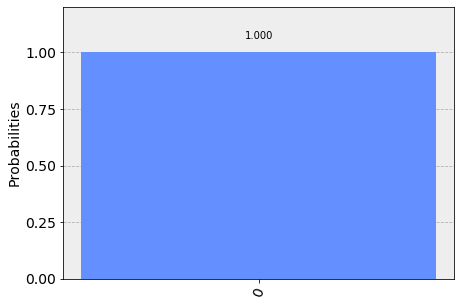

In [40]:
#The number of times to run the circuit
number_of_shots=1
# Import BasicAer
from qiskit import BasicAer

# Use BasicAer's qasm_simulator
backend_sim = BasicAer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator, running it "number_of_shots" times.
job_sim = execute(circuit, backend_sim, shots=number_of_shots)

# Grab the results from the job.
result_sim = job_sim.result()

# Print the counts, which are contained in a Python dictionary
counts = result_sim.get_counts(circuit)
print(counts)

from qiskit.tools.visualization import plot_histogram

# Plot the results on a bar chart
plot_histogram(counts)

# Question 1

- What do you see?  Discuss with your group how to interpret the histogram.
- Change the number_of_shots to 100 or 1000 - doing this correspinds to flipping a coin 100 or 1000 times. What should you expect to see? What do the x and y axis of the plot indicate?

# Quantum Random walk generator
Now that we have our quantum coin flipper (our quantum circuit) ready, we are going to flip our quantum coin a 100 times and count the number of times we get 1s and the number of times we get 0s.
If we get 50 Heads and 50 Tails, then we have taken 50 steps to the front and 50 steps back, so we are back to where we started. 
Run the code a couple of times to determine where your location should be after 100 steps. Note that we are starting from the origin at 0.
Is your location the same each time you run the code? Discuss with your group why your location changes each time.


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.]),
 array([-40.5       , -38.52439024, -36.54878049, -34.57317073,
        -32.59756098, -30.62195122, -28.64634146, -26.67073171,
        -24.69512195, -22.7195122 , -20.74390244, -18.76829268,
        -16.79268293, -14.81707317, -12.84146341, -10.86585366,
         -8.8902439 ,  -6.91463415,  -4.93902439,  -2.96341463,
         -0.98780488,   0.98780488,   2.96341463,   4.93902439,
          6.91463415,   8.8902439 ,  10.86585366,  12.84146341,
         14.81707317,  16.79268293,  18.76829268,  20.74390244,
         22.7195122 ,  24.69512195,  26.67073171,  28.64634146,
         30.62195122,  32.59756098,  34.57317073,  36.54878049,
         38.52439024,  40.5       ]),
 <a list of 41 Patch objects>)

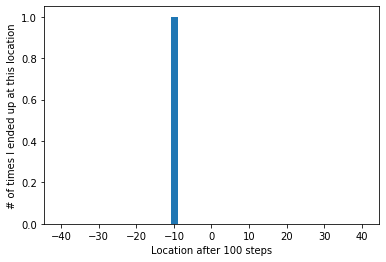

In [41]:
#number of steps
number_of_steps=100
# number of time we run each 100 step trial
number_of_trials=1

########################
# DO NOT CHANGE BELOW THIS POINT
########################
# Import BasicAer
from qiskit import BasicAer

# Use BasicAer's qasm_simulator
backend_sim2 = BasicAer.get_backend('qasm_simulator')

histarr=np.array([])

for i in range(number_of_trials):
# Execute the circuit on the qasm simulator, running it number_of_steps times.
    job_sim2 = execute(circuit, backend_sim2, shots=number_of_steps)

# Grab the results from the job.
    result_sim2 = job_sim2.result()
# Get the counts, which are contained in a Python dictionary
    counts2 = result_sim2.get_counts(circuit)
# Determine net number of steps walked 
    steps= np.array([(counts2['0'] - counts2['1'])])
    histarr=np.append(histarr,steps)

# Make histogram    
plt.xlabel("Location after 100 steps")
plt.ylabel("# of times I ended up at this location")    
plt.hist(histarr,bins=41,range=(-40.5,40.5))    
    



# Probability distribution for random walk
By running the code a few times you should have seen that for each trial of 100 steps you ended up at a different location. 
We are now going to try to answer the question: How often are we going to end up +10 steps from where we started or -20 steps or 0 steps?
In other words we are now going to determine the probability distribution for ending up at a particular location.
In order to do this we will rerun our simulation of a 100 step random walk several times - do this by changing the value of the  variable number_of_trials above from 1 to:
- a. 10
- b. 100
- c. 1000
- d. 10000

This will take a minute to run for each of the options - be patient and try to predict the answers to the questions below.


# Question 2
- If you were to do a 100 step random walk, what is the most likely location that you would end up in ? i.e. From your graph what is your most probable location.
- Describe the shape of the graph that you see: be creative in the choice of your words?
- How often will you end up +40 or -40 steps away from your starting point?

# Gaussian or Normal Distribution
The curve that you saw in your random walk trials is called a Gaussian or [Normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) and takes the form:

$ f(x | \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}}  e^{- \frac{(x -\mu)^2}{2 \sigma^2}}$

Here $\mu$ is the mean value (or average) of the distribution and $\sigma$ is the standard deviation. 
For your trials you should have found the average to be zero ($\mu =0 $) and the standard deviation $\sigma = \sqrt{total number of steps} = \sqrt{N}$. So the probability that we end up $k$ steps away after taking a total of $N$ steps is

$ P(k) = \frac{1}{\sqrt{2 \pi } N }  e^{- \frac{(k)^2}{2 N}}$


Lets test this out by plotting both the histogram for 10,000 trials from our simulation as well as the function above. Run the code below to do this



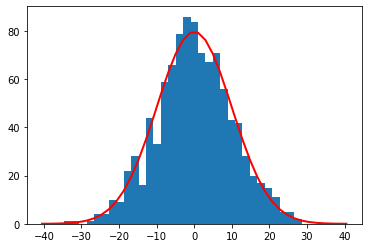

In [27]:
# mean or average
mu = 0 
# Variance or standard deviation
sigma = np.sqrt(number_of_steps) # mean and standard deviation\
## Set up plot
count, bins, ignored = plt.hist(histarr,bins=41,range=(-40.5,40.5))
plt.plot( bins, 2*number_of_trials/(sigma * np.sqrt(2 * np.pi))*np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
# plot histogram and curve
plt.show()

# Great but what does this have to do with motion of atoms in gas?

Imagine being in a very crowded place. To guide your imaginationa here's a picture of a crowded railway platform in Mumbai, India.
<img src="files/crowd.jpg">

You try to walk in a straight line towards the exit but are constantly bumping into other people and are being tossed around in random directions. 
This is pretty much the story of an atom inside a gas.

For an ideal gas, the atoms do not experience any force until they collide with other atoms. Once atoms collide, their trajectory changes. 

We can think of the distance between each collision that the atom experiences (aka mean free path) as the step size, and the direction in which the atom moves (front or back) is determined randomly just like a coin flip.
Run the code below to see an animation of how an atom in an ideal gas moves.




In [13]:
#Source wikipedia
from IPython.display import HTML
HTML('<img src="https://upload.wikimedia.org/wikipedia/commons/5/51/Brownianmotion5particles150frame.gif">')

# <font color ='blue'> Part 2 : Using random walk to understand diffusion. </font> 
Alright now that we know that an atom moves around in a random way and that randomness can be encoded mathemamatically in a normal distribution, what can we do with that information?

- **Objective: We are going to use random walk to model diffusion**

Let us picture a single atom inside an ideal gas moving at a velocity $v_0$ - lets give it a name - Bob. 

<img src="files/random_scale.jpg">

- In each bit of time ∆t, either a collision moves Bob by a single step.
- Bob moves at speed $v_0$ between collisions, and it takes time ∆t for each step to occur. So the distance traveled between collisions (the __mean free path__, or step length, 𝛌 ) is: 
$\lambda \simeq v_0 \Delta t$
- The more densely packed the atoms are the smaller the value of $\lambda$.
- Let us say Bob collides with another atom which we will call Alice. Since the motion of all the atoms are very random, Bob does not know which direction Alice is going to come in and hit him. 
- In 1D Alice could either hit him from the front or from behind. If hit from the front Bob would move one step back and if hit from behind he would move one step ahead. Here one step means Bob travels a distance $\lambda$ in time $\delta t$ before he is struck again?
- The trajectory that Bob follows is the same as that of a random walk we simulated above.

<font color='green'>Now that we know that the trajectory of a atom in an ideal gas can be modelled as a random walk lets do some calculations of some quantities in 1D. We will extend this to 3D at the end.</font>

<font color='red'>At this point we want to also stop talking about discrete steps and use instead position coordinates $x= k \lambda$ instead. So we can rewrite our probability distribution in terms of $x$ as </font>

$ P(x) = \frac{1}{\sqrt{2 \pi N\lambda^2 } }  e^{- \frac{(x)^2}{2 N \lambda^2}}$

Here 
- $\lambda$ : Mean free path (the average distance travelled between two collisions)
- $N$ : is the total number of steps



# Question 3
We want to able to figure out how Bob is able to "diffuse" or "walk randomly" from one corner of the gas to the other

1. What is the average net displacement of an atom in an ideal gas? Hint: What was your average displacement after 100 steps of a random walk. 



# Mean displacement or Mean squared displacement or Root Mean Squared (rms) displacement?
From your answer above you should have realized that the talking about the average displacement is not very useful. We do not care which direction he is diffusing in just the distance from his original starting position. 

So a more useful probability distribution to look at is the square of the distance $x^2$.
This can be evaluated simply as 

$ P(x^2) = x^2 \times P(x) = \frac{1}{\sqrt{2 \pi N\lambda^2 } } x^2 e^{- \frac{(x)^2}{2 N \lambda^2}}$

# Question 4 
- Why don't we simply use distance instead of taking the square of the displacement and then taking its square? Hint: The answer has more to do with math/ stats than physics.

Run the code below to see what the Probability distribution of the mean square displacement looks like.


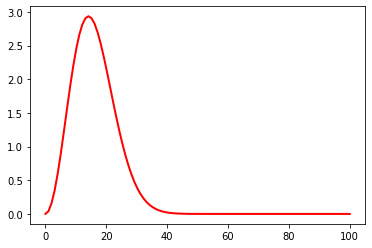

In [29]:

# Total number of steps
N = 100. # mean and standard deviation
# Mean free path : currently set 1 nm
l = 1.

x = np.linspace(0.,100,100) # 100 linearly spaced numbers
#y = numpy.sin(x)/x

plt.plot( x, x**2/( np.sqrt(2 * np.pi * N * l**2))*np.exp( - (x)**2 / (2 * N * l**2) ),linewidth=2, color='r')

plt.show()

# Question 5
- From your graph above can you determine the most likely value of the $x$? 
- What happens to the most likey value of $x$ if you increase or decrease the mean free path $\lambda$?

- What happens to $x$ if you increase or decrease the total number of steps N ?

Extra Info: This is the same shape as the Maxwell-Boltzmann distribution which tells us the probability distribution of speeds of particles in a gas.


The number of steps $N$ is really just a measure of time $t$. How do we see this? 
The rate at which collisions occur is simply given by the speed at which the atoms collide divided by the distance between collisions (aka mean free path), i.e. Rate of collision = $v_0/\lambda$. Now that we know the rate of collision how many total number of steps (N) have been taken in time $t$.
- Write an expression for $N$ in terms of $v_0,\lambda$ and $t$.

- Eliminate $N$ and rewrite the probability distribution below in terms of $v_0$ and $\lambda$ and $t$

$P(x^2) = \frac{1}{\sqrt{2 \pi N\lambda^2 } } x^2 e^{- \frac{(x)^2}{2 N \lambda^2}}$

- How does the distance travelled by Bob change with time?
 Hint: Run the code below and see how the peak of the distribution moves.


//anaconda3/envs/qiskit/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
//anaconda3/envs/qiskit/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in multiply


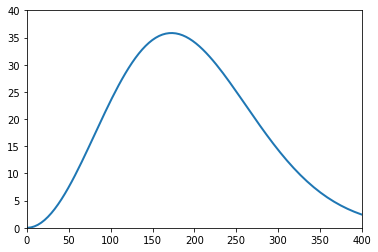

In [38]:
# Average speed of Bob: currentl set at 100 nm/s
v0 = 100. 
# Mean free path : currently set 1 nm
l = 1.


import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 400))
ax.set_ylim(( 0, 40))

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    x = np.linspace(1, 600, 150)
    #y = np.sin(2 * np.pi * (x - 0.01 * i))
    y = x**2/( np.sqrt(2 * np.pi * v0 * l *i))*np.exp( - (x)**2 / (2 *  v0 *l *i))
    #print(i)
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=150, interval=20, blit=True)
HTML(anim.to_html5_video())

# The Diffusion constant 
We now define a quantity called the diffusion constant $D = \lambda v_0$. Rewriting the probability distribution in terms of this quantity we see that

$P(x^2) = \frac{1}{\sqrt{ \pi D t } } x^2 e^{- \frac{(x)^2}{ 2 D t}}$

Note: You will find slightly different definitions of D in different texts. For example, some texts defined $D=1/2 \lambda v_0$. 

# Question 6

a. What are the units of the diffusion constant?

b. How does the value of D affect the rate of diffusion ? Hint: use the code below and change the value of D to understand how the rate of diffusion would change.

c. What is the typical values for the diffusion constant (aka diffusion coefficient) of a gas ? - Google this


Extra Info:
The standard deviation of the distribution : S.D. $ \sigma = \sqrt{D t}$. Okay so what does this tell me? 

The standard deviation tells us how spread out the distribution is. So larger the value of $\sigma$, the more likely it is to find Bob far away.

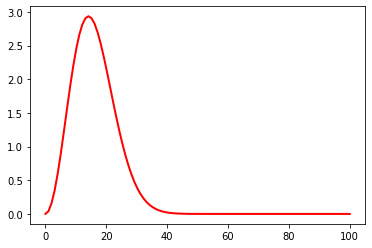

In [39]:

# Diffusion constant of Bob
D = 100. # mean and standard deviation
# Mean free path : currently set 1 nm
l = 1.
# set time for diffusion, 2 seconds 
t= 2

x = np.linspace(0.,100,100) # 100 linearly spaced numbers

plt.plot( x, x**2/( np.sqrt(np.pi * D *t))*np.exp( - (x)**2 / (2 D *t) ),linewidth=2, color='r')

plt.show()

# So what is the rate at which a gas diffuses ?
What we have determined so far is just the probability of finding Bob some distance squared $x$ from his starting point. 
We have tried to characterize the rate at which he diffuses by looking at how the peak of this distribution changes over time. In other words we know what Bob's most likely position is going to be as time progresses. 
Mathematically what have done is determined the r.m.s (root mean square) value of the position $x$, in terms of $D$ and time $t$ this is simply.

$x_{rms}=\sqrt{\overline{x^2}} =\sqrt{\langle x^2 \rangle} =  \sqrt{2 D t}$

Therefore, the rate at which Bob diffuses through the gas is $\propto \sqrt{t}$ as well as the property intrinsic to Bob - his diffusion cooefficient $D$. 

Q. How do we interpret the rms displacement $x_{rms}$?

Interpretation 1: It is the average (or loosely speaking - the most likely) distance travelled by a single gas molecule in a given time interval.

Interpretation 2: Roughly speaking it is the distance travelled by half the number of diffusing gas molecules in a given time interval.



Extra Info: It is an exercise in calculus to derive this expression$x_{rms} =  \sqrt{2 D t}$ from the probability distribution. This is not important for our understanding of diffusion so we wont go through it here. But there are numerous sources online where this has been worked out explicity.




# From 1D to 3D diffusion
The analysis we have just described can quite naturally be extended to the case of particles free to diffuse in two or three dimensions.  The three rules defining the random walk now apply in each of the two (or three) dimensions, and we assert that the motions in the x, y and z directions are statistically independent.  We have no reason to suspect that such an assumption is not valid.  In three dimensions, the diffusion coefficient D is defined in the way you might expect:

For 1D motion we were trying to determine the most likely location using what is called the r.m.s (root mean square) value  $\sqrt{\overline{x^2}}$. For 2D motion this would be 


$r^2=x^2+y^2$

$r^2=4Dt$

$r_{rms}^{2D}=\sqrt{\overline{r^2}}=\sqrt{4Dt}$

So if I wanted to find the average displacement of bob after 100 seconds in 2D then this would simply be $~\sim \sqrt{4\times D \times 100} $

# Question 7
- What is the expression for rms displacement $r_{rms}$ in 3D? Here $r^2 = x^2 +y^2 + z^2$.

# <font color='blue'>Part 3 : Random vs Coherent/directed motion </font>

Listeria, like all bacteria emit small molecules as waste product or for signaling. Here we will consider a “race” between a listeria bacteria (about 1 μm across) that swims along a straight track inside a (much larger ~15 μm) mammalian cell that it has infected. The listeria emits a pulse of signaling molecules. The listeria itself moves in the cell at a speed of about 5 μm/s. The question we want to tackle is whether molecules emitted by the listeria cell could move ahead of the cell as they diffuse. 



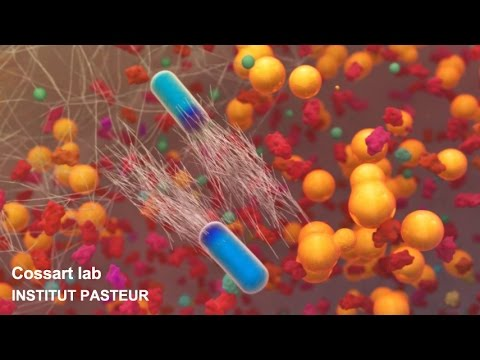

In [22]:
## Here is an informative video about the motion of listeria.
## Run this code block to display video
from IPython.display import YouTubeVideo
#https://www.youtube.com/watch?v=dlAPOa_QXAo
YouTubeVideo('dlAPOa_QXAo')

# Question 8

A. Assume that a Listeria cell, when at one end of the mammalian cell, emits a pulse of molecules with diffusion constant of D=200 μm2/s. The Listeria cell then moves to the other side of the mammalian cell, reaching the other side of the cell in 3 seconds. How much time does it take the diffusing molecules to reach the other end of the cell?

B. Can diffusion be faster than directed motion? Explain your reasoning.

C. If the mammalian cell were three times larger, by how much does the time to diffuse across a whole cell change? Explain your reasoning.

D. A different signaling molecule emitted by the Listeria has had a chemical attached to it that glows when illuminated by a particular light source. A pulse is seen to be emitted at t = 0 and 5 seconds later is observed to have expanded to a blob that has a radius of 2 μm. If you can describe this as diffusion in two dimensions how big would you expect the blob to be if you took another picture at t = 20 s? Can you find the diffusion constant? If you can, do so. If you can’t explain why not.

# Question 9
In this question we will try to work out how to understand if motion is random or directed.

A.  Compare and write expression for how the distance travelled ($x$) changes with time for a 
    
    i. A random walker

    ii. Directed (coherent) motion at constant speed.

    iii. Directed (coherent) motion under uniform acceleration starting from rest 
    
B. If you draw graph of $\log{(x)}$ vs $\log{(t)}$, for each of the cases above, they would all be
linear graphs. From your expressions above what would the slopes of each of these graphs be.
Explain how you could use this information to distinguish between directed and random motion.
